# Copulas Sampling

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import chaospy as cp
import pandas as pd

from temfpy.uncertainty_quantification import eoq_model

We specify a joint uniform distribution centered around $\mathbf{x^0}=(M, C, S) = (1230, 0.0135, 2.15)$ and spread the support 10% above and below the center. We then make a Nataf copula from the joint distribution, with specifying correlations, then draw $1,000$ random samples from the joint distribution of the input parameters.

In [2]:
dist = list()
for center in [1230, 0.0135, 2.15]:
    lower, upper = 0.9 * center, 1.1 * center
    dist.append(cp.Uniform(lower, upper))

In [3]:
joint_dist = cp.J(*dist)

In [4]:
corr = [[1, 0.6, 0.2], [0.6, 1, 0], [0.2, 0, 1]]

In [5]:
copula = cp.Nataf(joint_dist, corr)

In [6]:
x = copula.sample(10000, rule="random")

Let us look at the marginal distributions of $X$'s, say, $X_0$ and $X_1$.

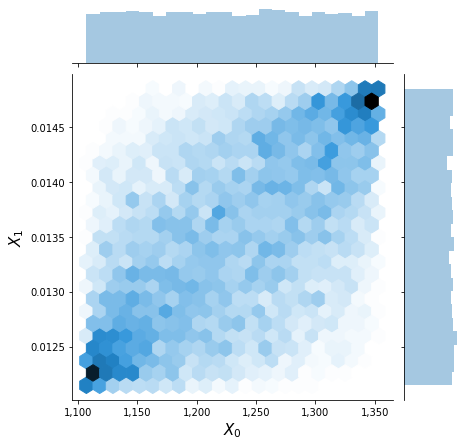

In [7]:
g = sns.jointplot(x=x[0], y=x[1], kind="hex")
g.set_axis_labels(r"$X_0$", r"$X_1$")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

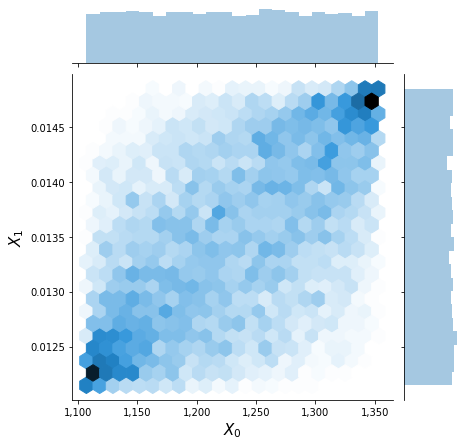

In [8]:
g.fig

We are now ready to compute the optimal economic order quantity for each draw.

In [9]:
y = eoq_model(x)

This results in the following distribution $f_{Y}$, and correlated marginal distribution between $Y$ and $X$'s.

[]

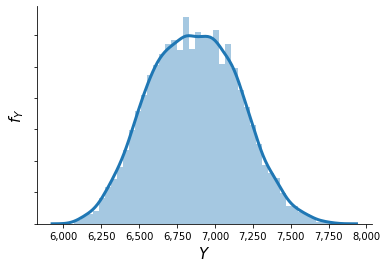

In [10]:
fig, ax = plt.subplots()

sns.distplot(y, ax=ax)

ax.set_xlabel(r"$Y$")
ax.set_ylabel(r"$f_Y$")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.axes.get_yaxis().set_ticklabels([])

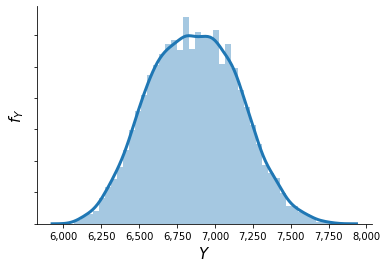

In [11]:
fig

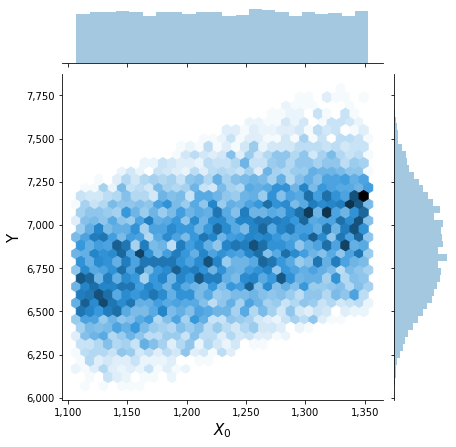

In [12]:
g = sns.jointplot(x=x[0], y=y, kind="hex")
g.set_axis_labels(r"$X_0$", "Y")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

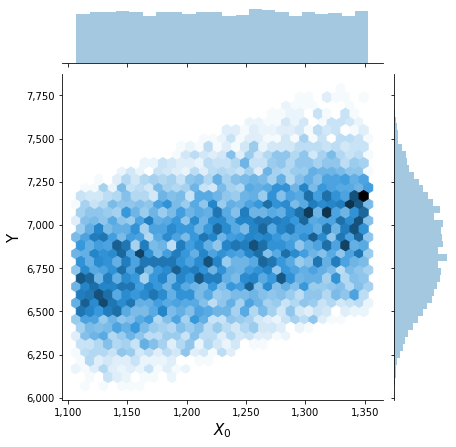

In [13]:
g.fig

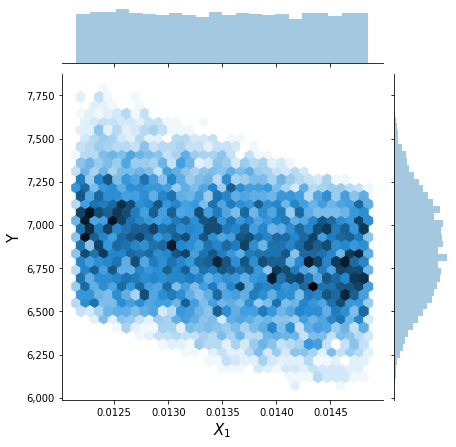

In [14]:
g = sns.jointplot(x=x[1], y=y, kind="hex")
g.set_axis_labels(r"$X_1$", "Y")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))

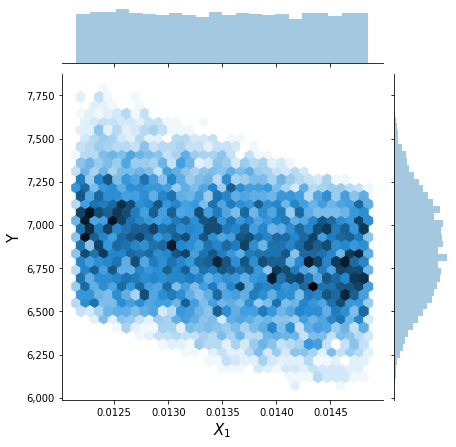

In [15]:
g.fig

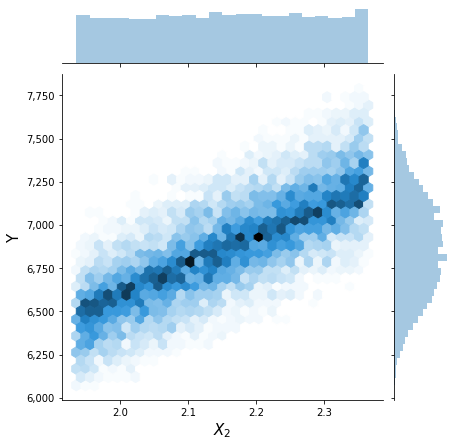

In [16]:
g = sns.jointplot(x=x[2], y=y, kind="hex")
g.set_axis_labels(r"$X_2$", "Y")
g.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
g.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

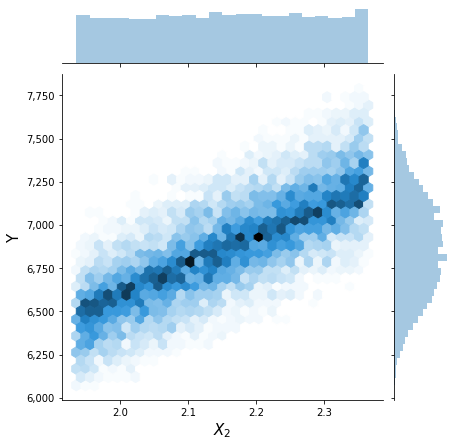

In [17]:
g.fig

Finally, the correlation matrix of all variables:

[Text(0, 0.5, 'Y'),
 Text(0, 1.5, '$X_0$'),
 Text(0, 2.5, '$X_1$'),
 Text(0, 3.5, '$X_2$')]

<Figure size 432x288 with 0 Axes>

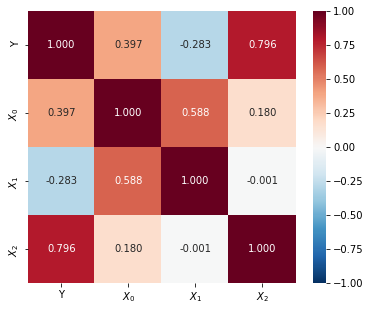

In [18]:
df = pd.DataFrame(data=[y, x[0], x[1], x[2]])

plt.clf()
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(
    df.T.corr(),
    vmin=-1,
    vmax=1,
    center=0,
    cmap="RdBu_r",
    annot=True,
    fmt=".3f",
)
ax.set_xticklabels(["Y", r"$X_0$", r"$X_1$", r"$X_2$"])
ax.set_yticklabels(["Y", r"$X_0$", r"$X_1$", r"$X_2$"])

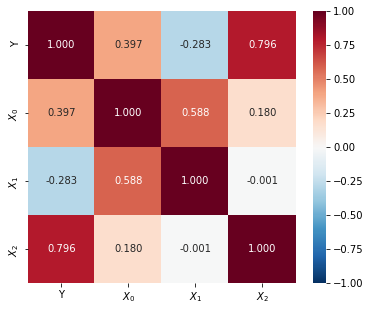

In [19]:
fig